In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt 
import statistics as st
import math as m

Punto 1


In [102]:
num = rnd.random(100) * 6 + 1
num2= []

for nro in num:
    num2.append(int(nro))
print(num2)

[1, 6, 1, 6, 6, 4, 1, 1, 6, 3, 2, 4, 1, 1, 2, 1, 6, 5, 4, 2, 4, 3, 2, 1, 1, 1, 5, 6, 6, 2, 3, 3, 2, 3, 4, 3, 1, 3, 1, 2, 1, 1, 4, 5, 4, 5, 5, 4, 6, 4, 5, 6, 2, 5, 3, 6, 3, 3, 5, 1, 1, 5, 4, 4, 5, 2, 1, 1, 5, 5, 6, 6, 3, 5, 5, 1, 1, 2, 5, 5, 4, 1, 5, 3, 6, 2, 5, 2, 5, 4, 5, 4, 3, 1, 2, 1, 5, 1, 4, 5]


punto 2 : creo programa que tire el dadito n veces y registre en un vector


In [58]:
def tirar_dado(n=20):
    
    num = rnd.random(n) * 6 +1
    num2= []
    six = 0

    for i in num:
        num2.append(int(i))
    
    for j in num2:
        if j == 6:
            six = six + 1
    
    avg = round(six / len(num),3)
    return six, avg


In [59]:
six, avg  = tirar_dado(90)
print ("cantidad de veces que salio el 6 : " + str(six) +  " promedio de veces que sale:  " + str (avg * 100) + "%")

cantidad de veces que salio el 6 : 15 promedio de veces que sale:  16.7%


punto 3:  ejemplo de charly, calcular el valor de PI

In [67]:
suma = 0
N = 10000

for i in range(N):
    x = rnd.random()
    y = rnd.random()

    if y < m.sqrt(1 - x**2):
        suma = suma + 1

integral = suma/N
pi = integral * 4
print(pi)

3.1408


punto 4 : integral de x**2 entre 0 y 4

In [5]:
suma = 0
N = 1000000

for i in range(N):
    
    x = rnd.random() * 4
    y = rnd.random() * 16

    if y < x**2:
        suma = suma + 1

integral = suma/N
area = 4*16
solution = integral * area 
print(solution)

21.34656


punto 5: integral de la distribucion campana de gauss

1.772


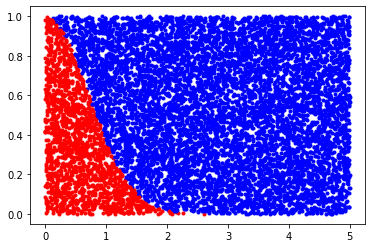

In [70]:
suma = 0
N = 10000
 
for i in range (N):
    x = rnd.random() * 5
    y = rnd.random() 

    if y < m.e**(-x**2):
        suma = suma + 1
        plt.plot(x,y,'.r')
    else:
        plt.plot(x,y,'.b')
    plt.show

integral = suma / N
area = 5
solucion = 2*integral*area
print(solucion)

punto 6: volumen de 1/8 de esfera

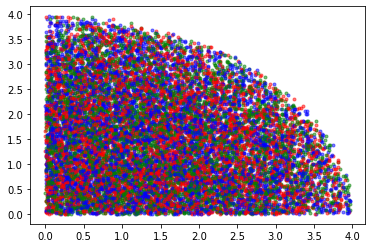

Vol montecarlo: 33.6 m^3. Vol definicion: 33.510321638291124m^3


In [132]:
suma = 0
N = 10000
R = 4

for i in range (N):
    #como los nros son positivos, va a estar en el primer octante
    x = rnd.random() * R
    y = rnd.random() * R
    z = rnd.random() * R
    d = x**2 + y**2

    if R**2 >= d :
        if z <=  m.sqrt(R**2 - d):
                suma = suma + 1
                plt.plot(x,y,'.g',alpha=0.5)
                plt.plot(x,z,'.b',alpha=0.5)
                plt.plot(z,y,'.r',alpha=0.5)


plt.show()
integral = suma / N
vol_recinto = R * R * R
vol_mc = integral * vol_recinto
vol_def = ((4/3) * m.pi * R**3 )/ 8 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )